Полезное видео: https://www.youtube.com/watch?v=wDTx3Kp2CmY&ab_channel=%D0%A6%D0%B5%D0%BD%D1%82%D1%80digital%D0%BF%D1%80%D0%BE%D1%84%D0%B5%D1%81%D1%81%D0%B8%D0%B9ITtensive

Источник кода: https://machinelearningmastery.ru/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045/

In [58]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Как правило, у вас будет набор данных, состоящий из образцов (строк) и их элементов (столбцов). Однако алгоритм спектральной кластеризации может быть применен только к графу связанных узлов.

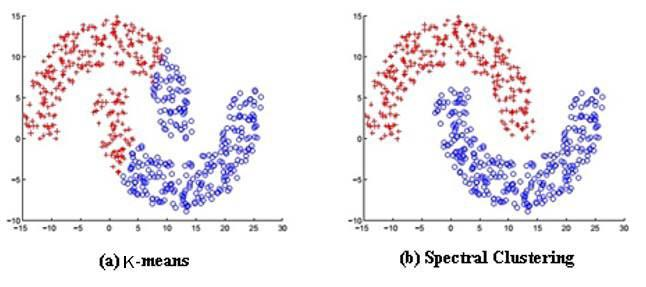

Следовательно, мы должны применить преобразования к нашим данным, чтобы перейти от таблицы строк и столбцов к графику. Предположим, что у нас был следующий набор данных. Мы можем ясно видеть, что данные могут быть разделены на три кластера.

Text(0, 0.5, 'Height')

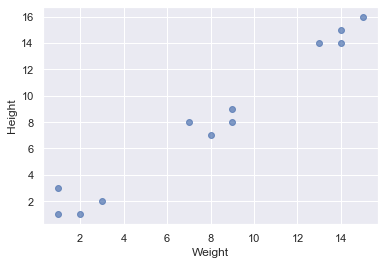

In [59]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

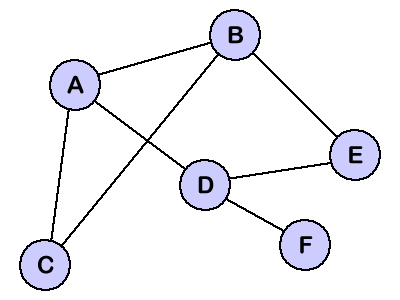

Сначала мы строим матрицу подобия, матрицу NxN, где N - количество выборок. Заполняем ячейки евклидовым расстоянием между каждой парой точек.

Затем мы создаем матрицу смежности, копируя содержимое матрицы подобия, и только на этот раз мы устанавливаем порог так, чтобы, если расстояние больше, чем предопределенный предел, мы устанавливаем значение в 0 и 1 в противном случае.

Матрица смежности может затем использоваться для построения графа. Если в ячейке матрицы смежности есть 1, то мы рисуем ребро между узлами столбца и строки.

In [60]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


In [61]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

Случайным образом генерируем граф и печатаем его матрицу смежности.

[[0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 1 1 0 0 1 0]
 [0 0 1 1 0 0 1 1 1 1]
 [0 1 1 1 0 0 1 0 0 1]
 [0 1 0 0 1 1 0 0 0 1]
 [1 0 1 0 1 0 0 0 1 1]
 [1 1 0 1 1 0 0 1 0 1]
 [0 1 1 0 1 1 1 1 1 0]]


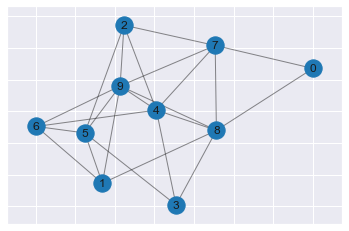

In [62]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

Матрицей смежности (Adjacency matrix) A=||αi,j|| невзвешенного графа G=(V,E) называется матрица A[V×V], в которой αi,j — количество рёбер, соединяющих вершины vi и vj, причём при i=j каждую петлю учитываем дважды, если граф не является ориентированным, и один раз, если граф ориентирован.

Матрицей смежности A=||αi,j|| взвешенного графа G=(V,E) называется матрица A[V×V], в которой αi,j — вес ребра, соединяющего вершины vi и vj.

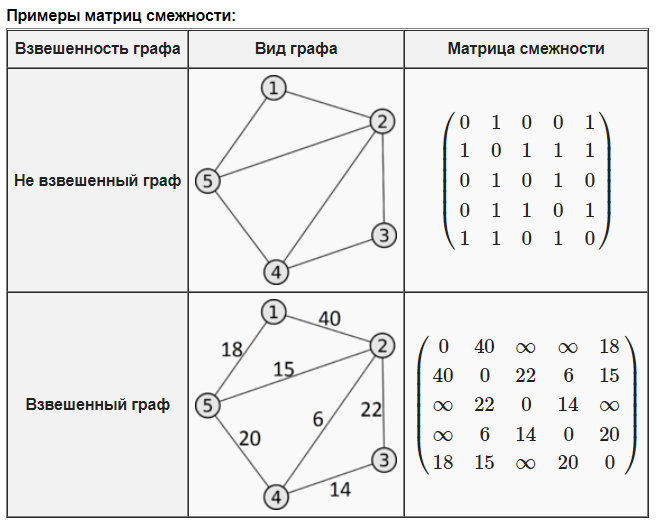

Как только мы построим матрицу смежности, мы создадим матрицу степеней. Для каждой строки матрицы степени мы заполняем ячейку вдоль диагонали, суммируя все элементы соответствующей строки в матрице смежности.

Затем мы вычисляем матрицу Лапласа, вычитая матрицу смежности из матрицы степеней.

In [63]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)

# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[2 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 7]]
laplacian matrix:
[[ 2  0  0  0  0  0  0 -1 -1  0]
 [ 0  4  0  0  0 -1 -1  0 -1 -1]
 [ 0  0  4  0 -1 -1  0 -1  0 -1]
 [ 0  0  0  3 -1 -1  0  0 -1  0]
 [ 0  0 -1 -1  6  0 -1 -1 -1 -1]
 [ 0 -1 -1 -1  0  5 -1  0  0 -1]
 [ 0 -1  0  0 -1 -1  4  0  0 -1]
 [-1  0 -1  0 -1  0  0  5 -1 -1]
 [-1 -1  0 -1 -1  0  0 -1  6 -1]
 [ 0 -1 -1  0 -1 -1 -1 -1 -1  7]]


Получив матрицу Лапласа, мы можем воспользоваться одним из ее специальных свойств для классификации наших данных.

* Если граф (W) имеет K компонент связности, то L имеет K собственных векторов с собственным значением 0.

Следовательно, поскольку в нашем текущем примере у нас только один компонент, одно собственное значение будет равно 0.

**Почему только один компонент? Как вообще понимаем сколько компонент? Это всмысле отсылка к методу главных компонент идет?**

про собственные значения и собственные векторы: http://mathprofi.ru/sobstvennye_znachenija_i_sobstvennye_vektory.html

In [64]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[0.000 1.624 8.247 7.638 6.986 6.282 2.784 3.175 4.601 4.663]
eigenvectors:
[[0.316 -0.845 -0.071 -0.094 -0.010 -0.126 0.072 -0.233 -0.306 -0.056]
 [0.316 0.217 0.045 -0.191 -0.316 -0.235 0.325 -0.436 0.377 -0.470]
 [0.316 0.095 0.080 0.228 -0.139 -0.435 0.105 0.672 -0.276 -0.292]
 [0.316 0.149 -0.143 0.075 -0.282 -0.072 -0.850 -0.193 -0.087 -0.016]
 [0.316 0.070 0.174 -0.710 0.277 -0.259 -0.101 0.197 0.165 0.374]
 [0.316 0.250 0.242 -0.168 0.322 0.546 0.026 -0.084 -0.468 -0.349]
 [0.316 0.272 0.095 0.280 -0.191 -0.073 0.329 -0.285 -0.317 0.638]
 [0.316 -0.203 0.106 -0.003 -0.474 0.590 0.053 0.353 0.353 0.147]
 [0.316 -0.115 0.334 0.532 0.525 -0.052 -0.109 -0.079 0.442 0.001]
 [0.316 0.109 -0.863 0.053 0.288 0.115 0.149 0.088 0.116 0.021]]


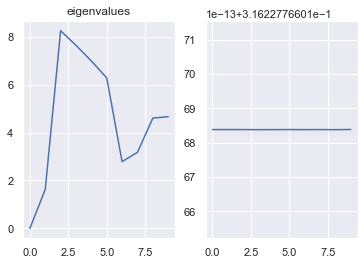

In [65]:
ig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
plt.show()

Как видим, из 10 собственных значений одно равно 0.

## 2 пример (2 компоненты)
Посмотрим на другой пример. Исходящий граф состоит уже из двух компонентов. Таким образом, 2 собственных значения будут равны 0.

[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


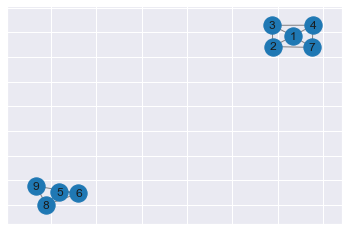

In [66]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [67]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [68]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.000 0.000 5.000 3.000 3.000 4.000 0.000 4.000 2.000]
eigenvectors:
[[0.894 -0.447 0.077 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 0.707 0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 -0.000 -0.588 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 -0.707 -0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 0.000 0.588 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.154 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.350 -0.707]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.855 -0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.350 0.707]]


2 нулевых => 2 главные компоненты

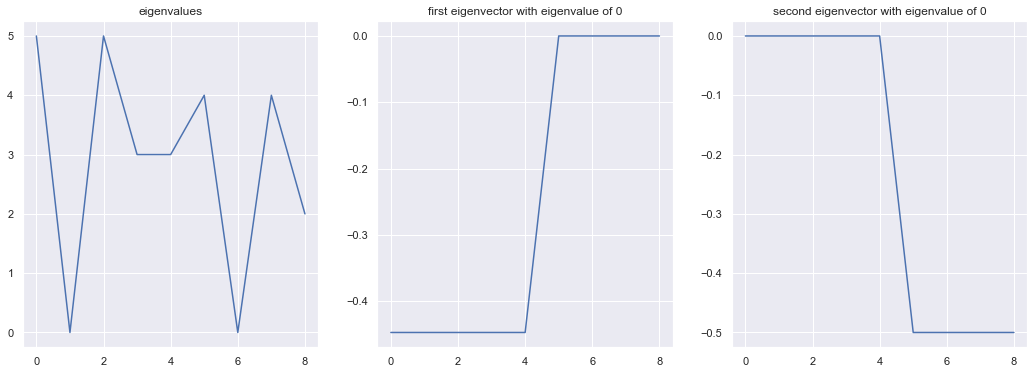

In [69]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0] # 2 компоненты
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]]) # 1 собственный вектор с собственным значением равным 0 
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]]) # 2 собственный вектор с собственным значением равным 0 
ax3.title.set_text('second eigenvector with eigenvalue of 0')

Если внимательно посмотреть на график каждого собственного вектора, мы ясно увидим, что первые 5 узлов отображаются на одно и то же значение, а остальные 5 узлов отображаются на другое значение. Мы можем использовать этот факт для размещения узлов в одной из двух категорий.

## 3 пример (1 компонента)

Посмотрим на другой пример. Опять же, график будет состоять из одного компонента, но на этот раз все выглядит так, как будто узлы должны быть размещены в одном из трех бинов.

[[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


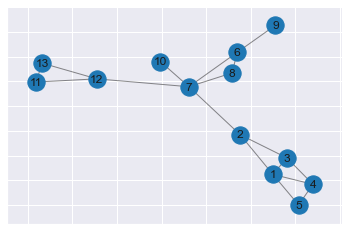

In [70]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [71]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  5 -1  0 -1  0 -1  0]
 [ 0  0  0  0  0 -1 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  2]]


In [72]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[6.333 5.020 -0.000 0.184 0.348 0.772 1.421 1.915 4.471 3.862 3.535 3.138
 3.000]
eigenvectors:
[[-0.136 0.867 -0.277 0.347 -0.078 0.040 0.009 -0.079 0.086 0.015 -0.092
  0.040 0.000]
 [0.312 -0.253 -0.277 0.205 -0.014 -0.054 -0.127 -0.527 0.318 0.023
  -0.299 0.482 0.000]
 [-0.070 -0.189 -0.277 0.333 -0.071 0.025 -0.035 -0.434 -0.667 0.008
  0.073 -0.355 -0.000]
 [0.056 -0.231 -0.277 0.384 -0.096 0.069 0.062 0.135 0.577 -0.044 0.352
  -0.473 -0.000]
 [0.018 -0.211 -0.277 0.403 -0.106 0.089 0.124 0.661 -0.269 0.016 -0.169
  0.380 0.000]
 [0.220 0.077 -0.277 -0.152 0.355 0.113 -0.214 0.077 -0.087 -0.795 0.122
  0.025 0.000]
 [-0.834 -0.166 -0.277 -0.102 0.113 -0.185 -0.174 -0.058 0.114 -0.042
  0.179 0.248 0.000]
 [0.142 0.029 -0.277 -0.140 0.284 -0.059 -0.670 0.226 -0.011 0.450 -0.196
  -0.240 -0.000]
 [-0.041 -0.019 -0.277 -0.187 0.545 0.495 0.507 -0.084 0.025 0.278 -0.048
  -0.012 -0.000]
 [0.156 0.041 -0.277 -0.125 0.174 -0.810 0.414 0.063 -0.033 0.015 -0.071
  -0.116 -

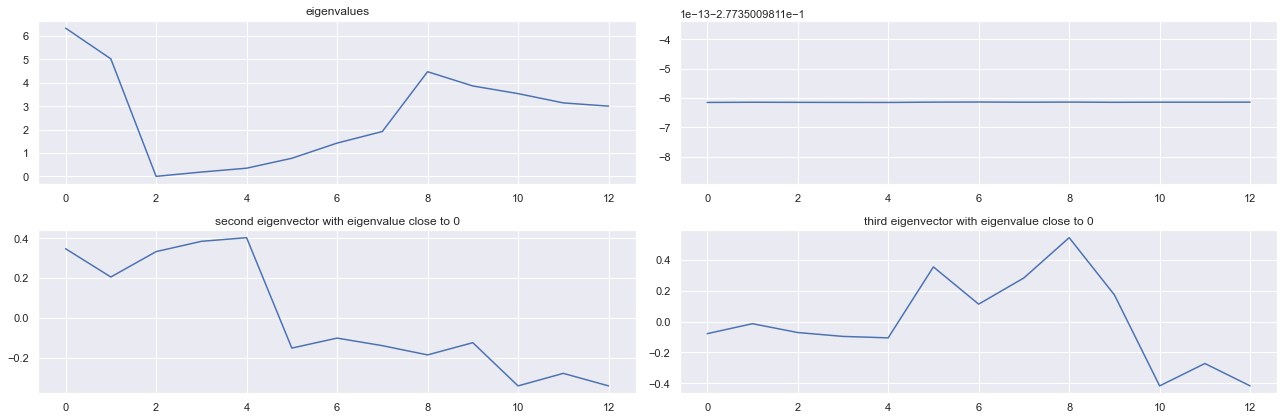

In [73]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0] # Почему порог равен 0.5?
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [74]:
i

array([2, 3, 4], dtype=int64)

In [76]:
# У нас же только 2 id в собственных значениях является компонентой, так как равен нулю. Почему здесь мы выбираем 1 элемент
# списка, который соответствует 3 элементу списка собственных значений ?
v[:, i[1]] 

matrix([[0.347],
        [0.205],
        [0.333],
        [0.384],
        [0.403],
        [-0.152],
        [-0.102],
        [-0.140],
        [-0.187],
        [-0.125],
        [-0.343],
        [-0.280],
        [-0.343]])

In [77]:
U = np.array(v[:, i[1]])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1])

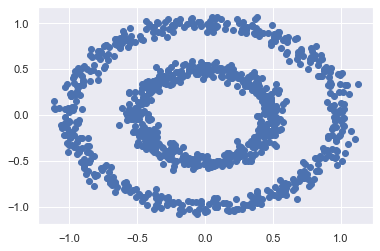

In [78]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

## K-means

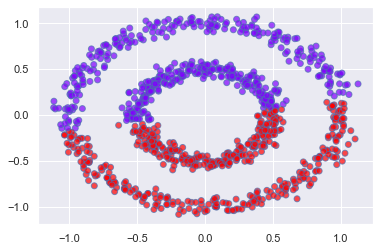

In [83]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

## SpectralClustering

c:\users\miste\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


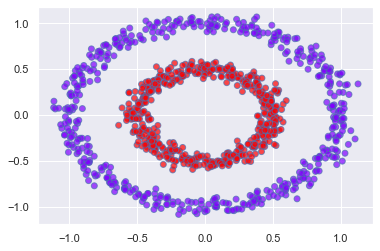

In [84]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

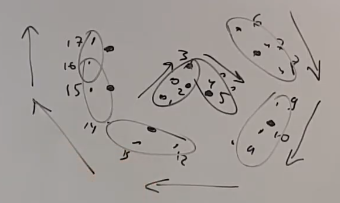

"Спектральная кластеризация выдает нам какие-то сырые данные в виде центроидов, которые соответствуют набору собственных векторов и направлений распространения точек. Эти центроиды можно подать на вход алгоритму Affinity propagation или DBSCAN для объединения центроидов"

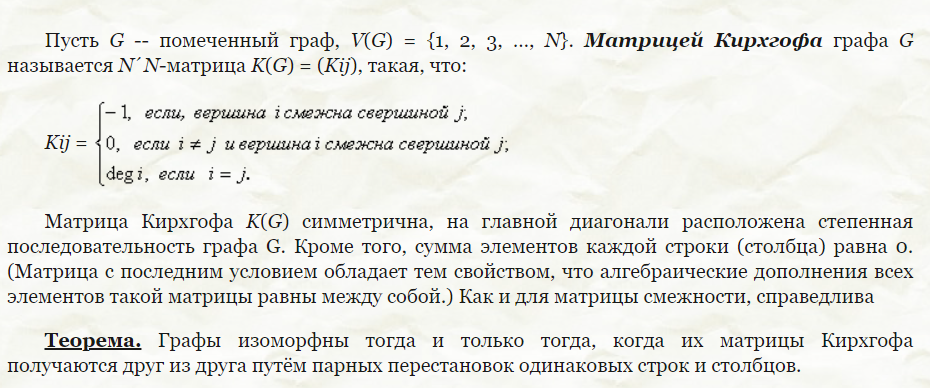